Student name: Rashawn Wilkinson

Student pace: Full time

Scheduled project review date/time:

Instructor name: Abhineet Kulkarni

Blog post URL:https://medium.com/@blkzen/such-a-convoluted-nn-a2afb6830c1e

# Image Classification with Deep Learning

Throughout the process of creating and validating an Image Classifier with Deep Learning, I will be using the **O.S.E.M.N.** process.

### Library & Data Input

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pickle 
%matplotlib inline
import seaborn as sns
import os
import cv2
import tensorflow as tf
import keras
from keras.models import load_model
#from keras.models import Sequential
from keras.layers import Dense
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D
#from tensorflow.keras.callbacks import TensorBoard
from keras import layers
from keras import models
from keras import optimizers
import datetime
#import ConfusionMatrix as con_mat


from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
from keras.datasets import cifar10
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

#import geopandas
from keras import backend as K
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


## O.　『Obtain』

In [2]:
path_train = r'C:\Users\User\Desktop\flatiron-school\mod-4\mod-4-proj\dsc-mod-4-project-v2-1-onl01-dtsc-ft-012120\chest-xray-pneumonia\chest_xray\chest_xray\train'
path_test = r'C:\Users\User\Desktop\flatiron-school\mod-4\mod-4-proj\dsc-mod-4-project-v2-1-onl01-dtsc-ft-012120\chest-xray-pneumonia\chest_xray\chest_xray\test'
path_valid = r'C:\Users\User\Desktop\flatiron-school\mod-4\mod-4-proj\dsc-mod-4-project-v2-1-onl01-dtsc-ft-012120\chest-xray-pneumonia\chest_xray\chest_xray\val'

train_batches = ImageDataGenerator().flow_from_directory(path_train, target_size=(160,130), classes=['NORMAL', 'PNEUMONIA'], batch_size=540)
test_batches = ImageDataGenerator().flow_from_directory(path_test, target_size=(160,130), classes=['NORMAL', 'PNEUMONIA'], batch_size=624)
valid_batches =  ImageDataGenerator().flow_from_directory(path_valid, target_size=(160,130), classes=['NORMAL', 'PNEUMONIA'], batch_size=2)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## S.　『Scrub』

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path_train,
        # All images will be resized to 160x130
        target_size=(160, 130),
        batch_size=540,
        # Since we used binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(path_valid,
                                                        target_size=(160, 130),
                                                        batch_size=2,
                                                        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## E.　『Explore』

(1, 160, 130, 3)


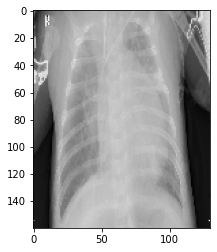

In [5]:
img_path = r'C:\Users\User\Desktop\flatiron-school\mod-4\mod-4-proj\dsc-mod-4-project-v2-1-onl01-dtsc-ft-012120\person1_virus_7.jpeg'


img = image.load_img(img_path, target_size=(160, 130))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Tensor shape
print(img_tensor.shape)

#One image of our data
plt.imshow(img_tensor[0])
plt.show()

## M.　『Model』

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(160, 130, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [8]:
# Extract model layer outputs
#layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
#activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [9]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=3, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=10)

Epoch 1/30
3/3 [==============================] - 29s 10s/step - loss: 0.6608 - acc: 0.5745 - val_loss: 0.7193 - val_acc: 0.5000
Epoch 2/30
3/3 [==============================] - 30s 10s/step - loss: 0.5707 - acc: 0.7630 - val_loss: 0.9861 - val_acc: 0.5000
Epoch 3/30
3/3 [==============================] - 30s 10s/step - loss: 0.6114 - acc: 0.7352 - val_loss: 0.7712 - val_acc: 0.5500
Epoch 4/30
3/3 [==============================] - 26s 9s/step - loss: 0.5748 - acc: 0.7475 - val_loss: 0.8038 - val_acc: 0.4500
Epoch 5/30
3/3 [==============================] - 24s 8s/step - loss: 0.5827 - acc: 0.7401 - val_loss: 0.3917 - val_acc: 0.5500
Epoch 6/30
3/3 [==============================] - 23s 8s/step - loss: 0.5828 - acc: 0.7298 - val_loss: 0.7029 - val_acc: 0.5000
Epoch 7/30
3/3 [==============================] - 27s 9s/step - loss: 0.5575 - acc: 0.7525 - val_loss: 0.2896 - val_acc: 0.5000
Epoch 8/30
3/3 [==============================] - 26s 9s/step - loss: 0.5551 - acc: 0.7444 - val_loss

Our data is ready to be utilized.

We reached an accuracy of 93%!

## N. 『iNterpret』

Let's put our model to the test.

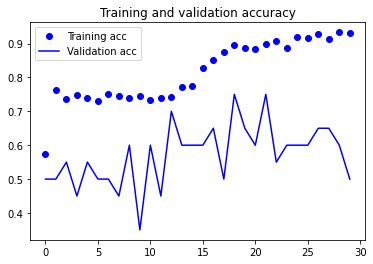

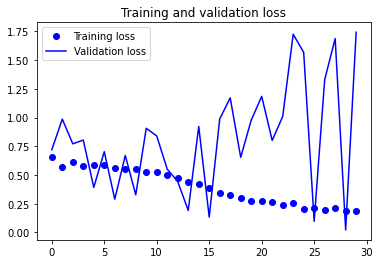

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

*Our model is set, let's save it*

In [11]:
model.save('xray_model.h5')

In [12]:
start = datetime.datetime.now()

In [13]:
train_datagen = ImageDataGenerator(rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path_train,
        # All images will be resized to 150x150
        target_size=(160, 130),
        batch_size=2,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(path_valid, 
                                                        target_size=(160, 130), 
                                                        batch_size=5, 
                                                        class_mode='binary')

history = model.fit_generator(train_generator, 
                              steps_per_epoch=4, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=5)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/30
4/4 [==============================] - 0s 120ms/step - loss: 518.2975 - acc: 0.3750 - val_loss: 0.7576 - val_acc: 0.5238
Epoch 2/30
4/4 [==============================] - 0s 117ms/step - loss: 210.0791 - acc: 0.7500 - val_loss: 2.0422 - val_acc: 0.4286
Epoch 3/30
4/4 [==============================] - 1s 133ms/step - loss: 119.7970 - acc: 0.8750 - val_loss: 2.2185 - val_acc: 0.6190
Epoch 4/30
4/4 [==============================] - 1s 127ms/step - loss: 329.4304 - acc: 0.6250 - val_loss: 0.1251 - val_acc: 0.5294
Epoch 5/30
4/4 [==============================] - 0s 103ms/step - loss: 46.2001 - acc: 0.8750 - val_loss: 0.5854 - val_acc: 0.6190
Epoch 6/30
4/4 [==============================] - 0s 119ms/step - loss: 9.0211 - acc: 0.7500 - val_loss: 0.6460 - val_acc: 0.5714
Epoch 7/30
4/4 [==============================] - 1s 131ms/step - loss: 21.8157 - acc: 0.7500 - val_loss: 0.5179 - val_acc: 0.428

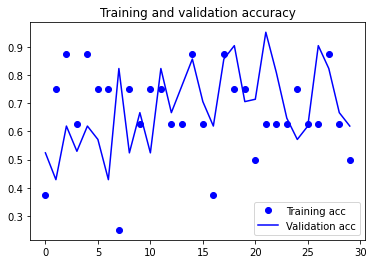

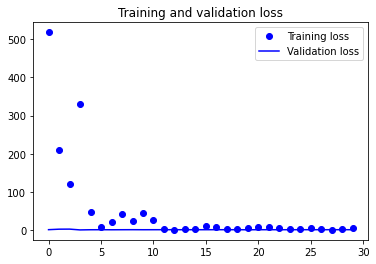

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
end = datetime.datetime.now()
elapsed = end - start
print('Training with data augmentation took a total of {}'.format(elapsed))

Training with data augmentation took a total of 0:00:14.160341


In [16]:
test_generator = test_datagen.flow_from_directory(path_test, 
                                                  target_size=(160, 130), 
                                                  batch_size=20, 
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 624 images belonging to 2 classes.
test acc: 0.7469512224197388


In [17]:
test_batch_classes= test_batches.classes

In [18]:
x_test = test_generator

**Classification Report**

In [19]:
batch_size = 5
target_names = ['NORMAL', 'PNEUMONIA']
y_pred = model.predict_generator(test_generator)

#Y_pred = model.predict_generator(test_batches, 60 // batch_size+1)
Y_pred = np.argmax(y_pred, axis=1)
#print('Confusion Matrix')
#cm = model.confusion_matrix(test_batches.classes, y_pred)
#print(cm)
print('Classification Report')
print(classification_report(test_batch_classes, y_pred.round(), target_names=target_names))


Classification Report
              precision    recall  f1-score   support

      NORMAL       0.39      0.16      0.22       234
   PNEUMONIA       0.63      0.85      0.72       390

    accuracy                           0.59       624
   macro avg       0.51      0.50      0.47       624
weighted avg       0.54      0.59      0.54       624



### Conclusion

We formatted thousands of x-rays of patients with and without pneumonia. After doing so, we created a model that processes these images, creates convulsions when reading the images, and gave us an accuracy of 93% at its highest. 